# 10 Building Generative Adversarial Networks to write numbers

## Agenda

1. Prepare and Preprocess MNIST Data 
2. Build GAN
3. Model Training and Save Results

In [1]:
# prerequisites
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Convolution2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers

K.set_image_dim_ordering('th')

Using TensorFlow backend.


## Part 1: Data Preparation

In [2]:
# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 100

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5 )/127.5
X_train = X_train.reshape(60000, 784)

Instructions for updating:
Colocations handled automatically by placer.


## Part 2: Model Construction

#### Define Generator Network

In [3]:
generator = Sequential()
generator.add(Dense(256, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))  # can we use sigmoid? 
generator.compile(loss='binary_crossentropy', optimizer=adam)

#### Define Discriminator Network

In [4]:
discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### Combine networks

In [5]:
# Optimizer
adam = Adam(lr=0.0002, beta_1=0.5)
# Combined network
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)

#### Define some helper functions

In [3]:
dLosses = []
gLosses = []

# Create a wall of generated MNIST images in the middle of training
def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    #plt.show()
    plt.savefig('images_gan/gan_generated_image_epoch_%d.png' % epoch)
    
# Save the generator and discriminator networks (and weights) for later use
def saveModels(epoch):
    generator.save('models_gan/gan_generator_epoch_%d.h5' % epoch)
    discriminator.save('models_gan/gan_discriminator_epoch_%d.h5' % epoch)

## Part 3: Model Training

In [6]:
num_epoch = 100
batchsize = 128

In [7]:
batchCount = int(X_train.shape[0] / batchsize)
print("Epochs:{}".format(num_epoch))
print('Batch size:{}'.format(batchsize))
print('Batches per epoch:{}'.format(batchCount))


Epochs:100
Batch size:128
Batches per epoch:468


--------------- Epoch 0 ---------------


  0%|                                                                                          | 0/468 [00:00<?, ?it/s]

Instructions for updating:
Use tf.cast instead.


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:02<00:00,  5.97it/s]


--------------- Epoch 1 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:05<00:00,  6.30it/s]


--------------- Epoch 2 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  5.91it/s]


--------------- Epoch 3 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:00<00:00,  9.38it/s]


--------------- Epoch 4 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:01<00:00,  9.13it/s]


--------------- Epoch 5 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:01<00:00,  7.79it/s]


--------------- Epoch 6 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:07<00:00,  7.70it/s]


--------------- Epoch 7 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:11<00:00,  5.20it/s]


--------------- Epoch 8 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.26it/s]


--------------- Epoch 9 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:29<00:00,  5.51it/s]


--------------- Epoch 10 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  6.17it/s]


--------------- Epoch 11 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:09<00:00,  5.99it/s]


--------------- Epoch 12 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  8.10it/s]


--------------- Epoch 13 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:03<00:00,  8.35it/s]


--------------- Epoch 14 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:57<00:00,  8.24it/s]


--------------- Epoch 15 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:04<00:00,  8.54it/s]


--------------- Epoch 16 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [01:01<00:00,  8.55it/s]


--------------- Epoch 17 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:52<00:00,  9.79it/s]


--------------- Epoch 18 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:47<00:00,  9.85it/s]


--------------- Epoch 19 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.72it/s]


--------------- Epoch 20 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.63it/s]


--------------- Epoch 21 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.70it/s]


--------------- Epoch 22 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.74it/s]


--------------- Epoch 23 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.57it/s]


--------------- Epoch 24 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.72it/s]


--------------- Epoch 25 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.63it/s]


--------------- Epoch 26 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.72it/s]


--------------- Epoch 27 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.52it/s]


--------------- Epoch 28 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.74it/s]


--------------- Epoch 29 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.51it/s]


--------------- Epoch 30 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.49it/s]


--------------- Epoch 31 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.82it/s]


--------------- Epoch 32 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.73it/s]


--------------- Epoch 33 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 11.00it/s]


--------------- Epoch 34 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.74it/s]


--------------- Epoch 35 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.74it/s]


--------------- Epoch 36 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.78it/s]


--------------- Epoch 37 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.81it/s]


--------------- Epoch 38 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.77it/s]


--------------- Epoch 39 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.87it/s]


--------------- Epoch 40 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.69it/s]


--------------- Epoch 41 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.08it/s]


--------------- Epoch 42 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.53it/s]


--------------- Epoch 43 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.57it/s]


--------------- Epoch 44 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.69it/s]


--------------- Epoch 45 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.71it/s]


--------------- Epoch 46 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.59it/s]


--------------- Epoch 47 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.43it/s]


--------------- Epoch 48 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.71it/s]


--------------- Epoch 49 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.64it/s]


--------------- Epoch 50 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.47it/s]


--------------- Epoch 51 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.66it/s]


--------------- Epoch 52 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.78it/s]


--------------- Epoch 53 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.74it/s]


--------------- Epoch 54 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.68it/s]


--------------- Epoch 55 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.77it/s]


--------------- Epoch 56 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.60it/s]


--------------- Epoch 57 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.72it/s]


--------------- Epoch 58 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.73it/s]


--------------- Epoch 59 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.74it/s]


--------------- Epoch 60 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.43it/s]


--------------- Epoch 61 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.63it/s]


--------------- Epoch 62 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.79it/s]


--------------- Epoch 63 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.77it/s]


--------------- Epoch 64 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.61it/s]


--------------- Epoch 65 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.80it/s]


--------------- Epoch 66 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.62it/s]


--------------- Epoch 67 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.59it/s]


--------------- Epoch 68 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.70it/s]


--------------- Epoch 69 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.67it/s]


--------------- Epoch 70 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.66it/s]


--------------- Epoch 71 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.71it/s]


--------------- Epoch 72 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.68it/s]


--------------- Epoch 73 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.72it/s]


--------------- Epoch 74 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.79it/s]


--------------- Epoch 75 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.74it/s]


--------------- Epoch 76 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.65it/s]


--------------- Epoch 77 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.62it/s]


--------------- Epoch 78 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.69it/s]


--------------- Epoch 79 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.68it/s]


--------------- Epoch 80 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:43<00:00, 10.68it/s]


--------------- Epoch 81 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.59it/s]


--------------- Epoch 82 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.73it/s]


--------------- Epoch 83 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.50it/s]


--------------- Epoch 84 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.70it/s]


--------------- Epoch 85 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.64it/s]


--------------- Epoch 86 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.59it/s]


--------------- Epoch 87 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.59it/s]


--------------- Epoch 88 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.53it/s]


--------------- Epoch 89 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.60it/s]


--------------- Epoch 90 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.65it/s]


--------------- Epoch 91 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.55it/s]


--------------- Epoch 92 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.56it/s]


--------------- Epoch 93 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.54it/s]


--------------- Epoch 94 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.61it/s]


--------------- Epoch 95 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.62it/s]


--------------- Epoch 96 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.65it/s]


--------------- Epoch 97 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.48it/s]


--------------- Epoch 98 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.68it/s]


--------------- Epoch 99 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:44<00:00, 10.66it/s]


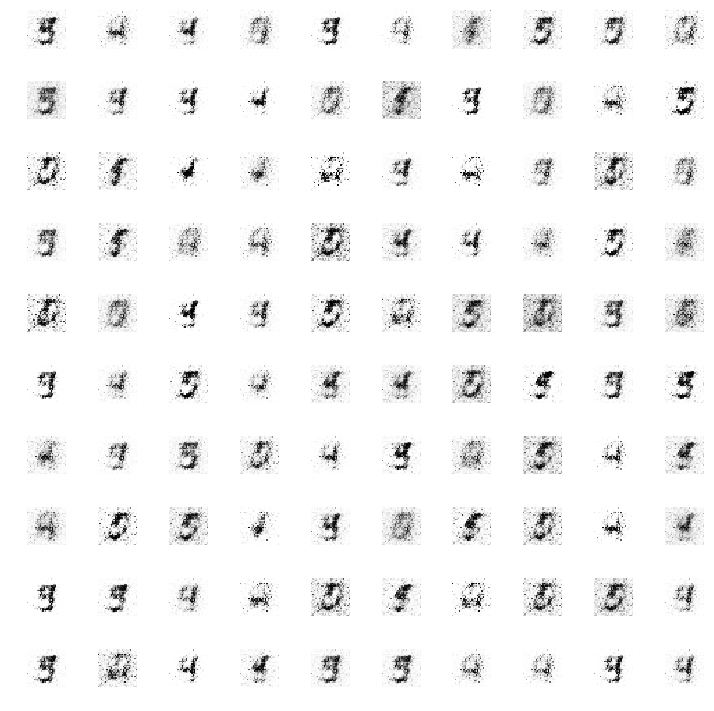

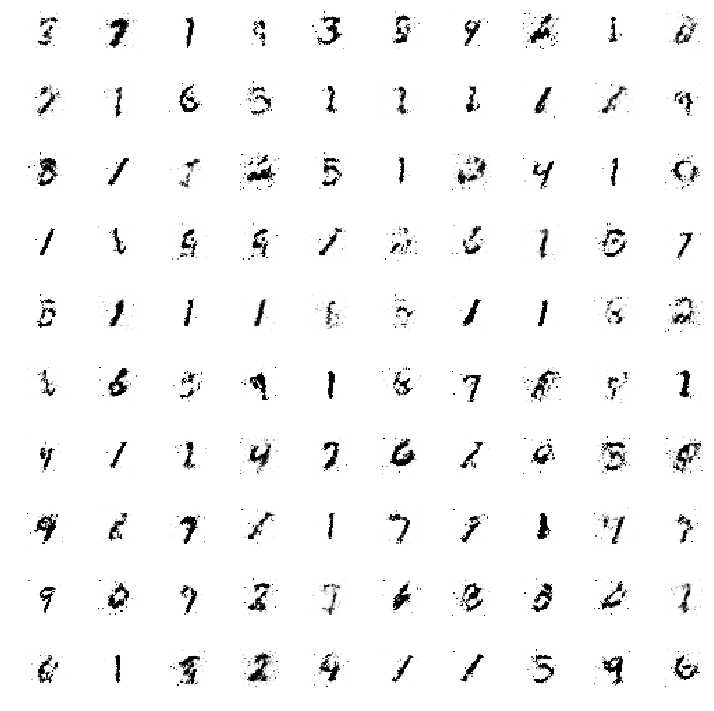

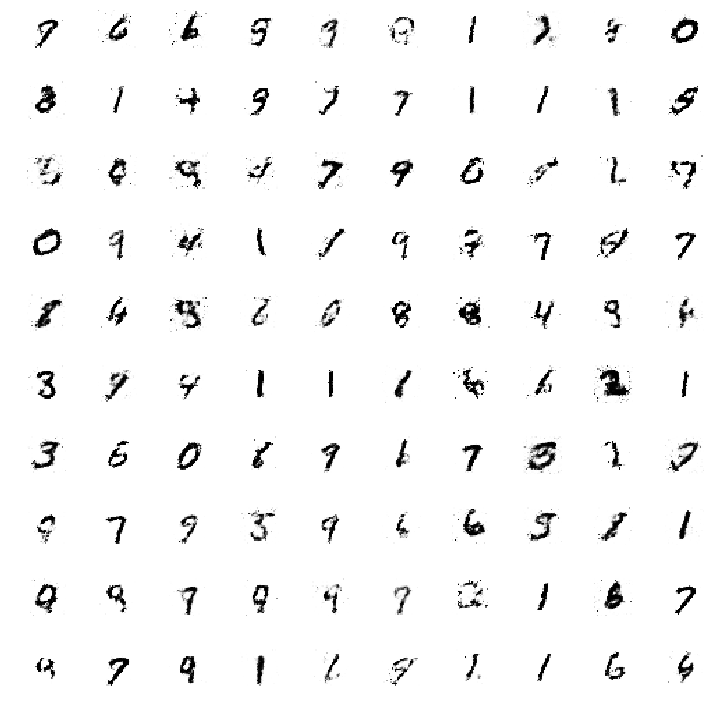

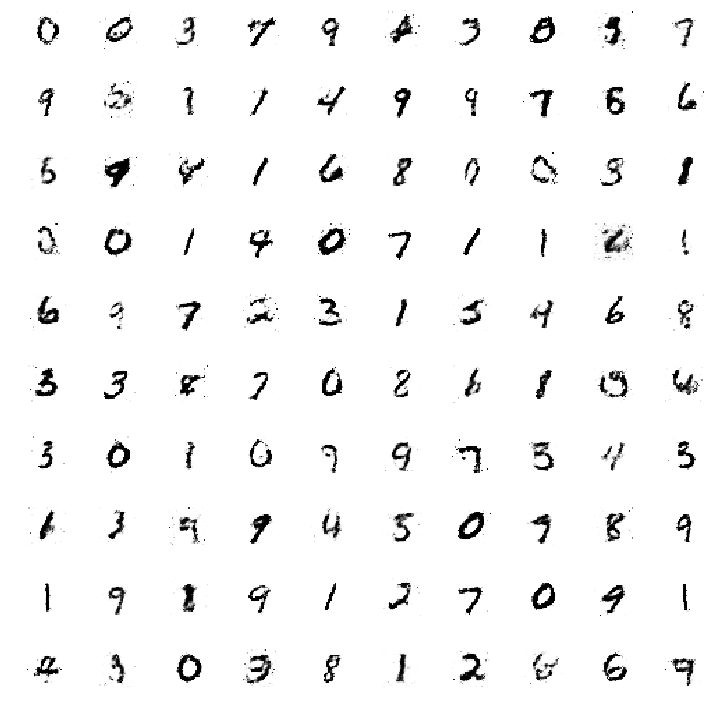

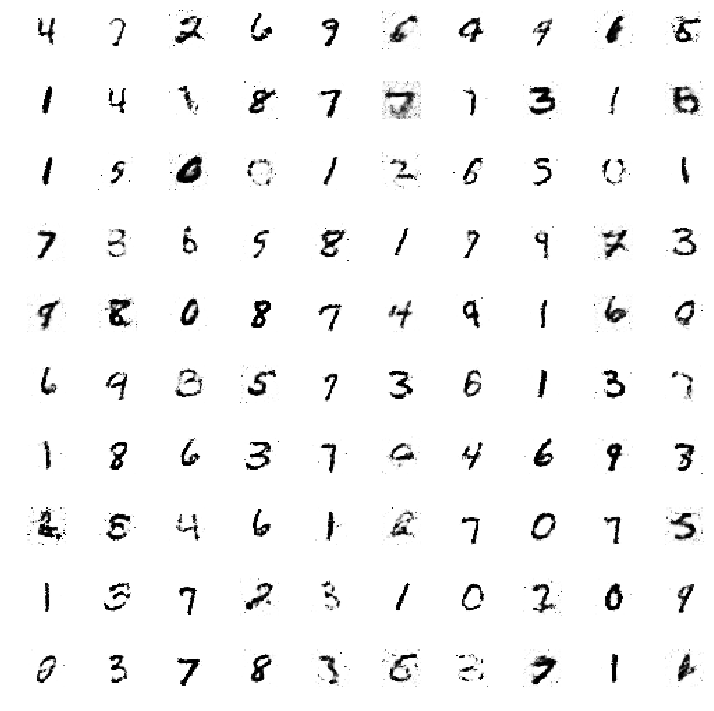

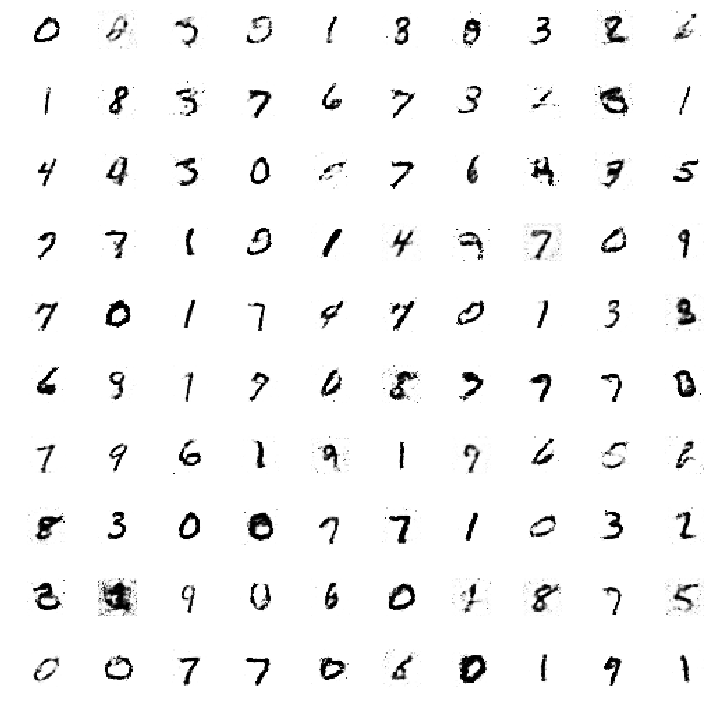

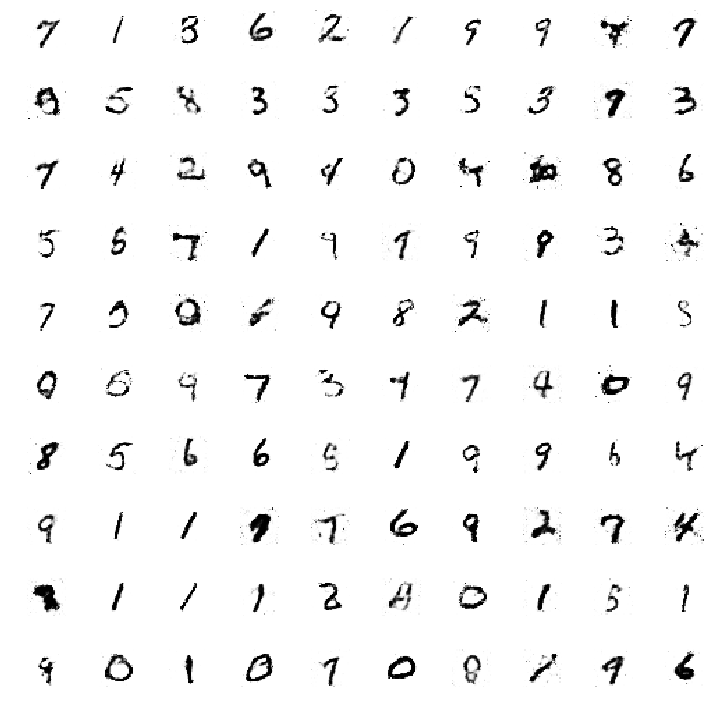

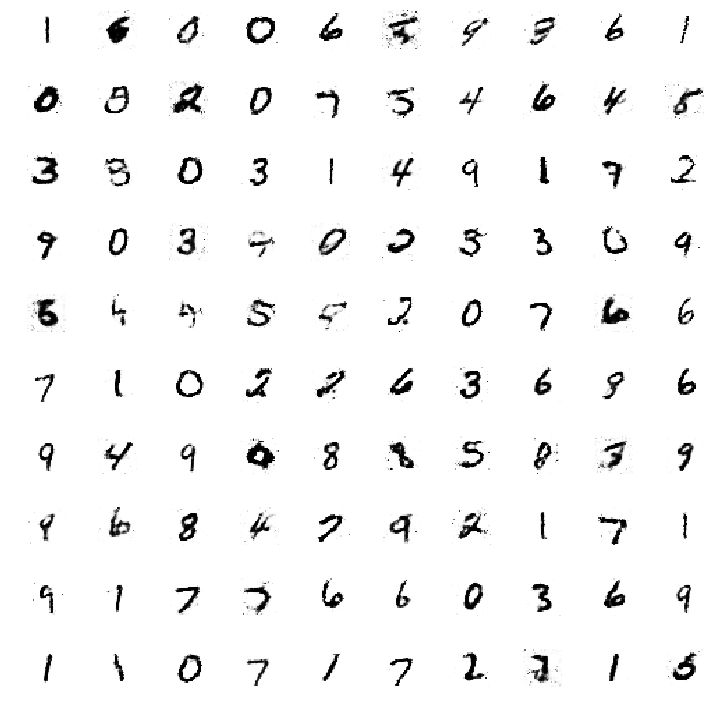

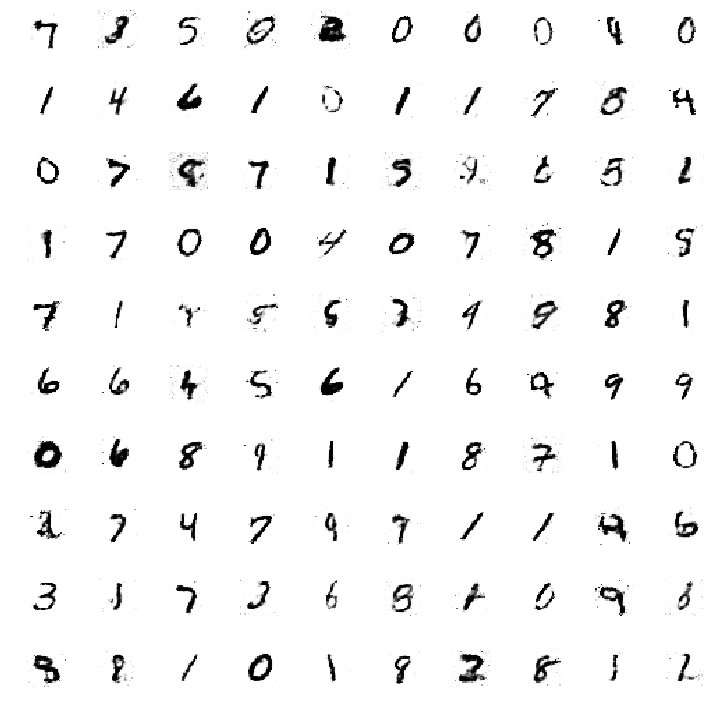

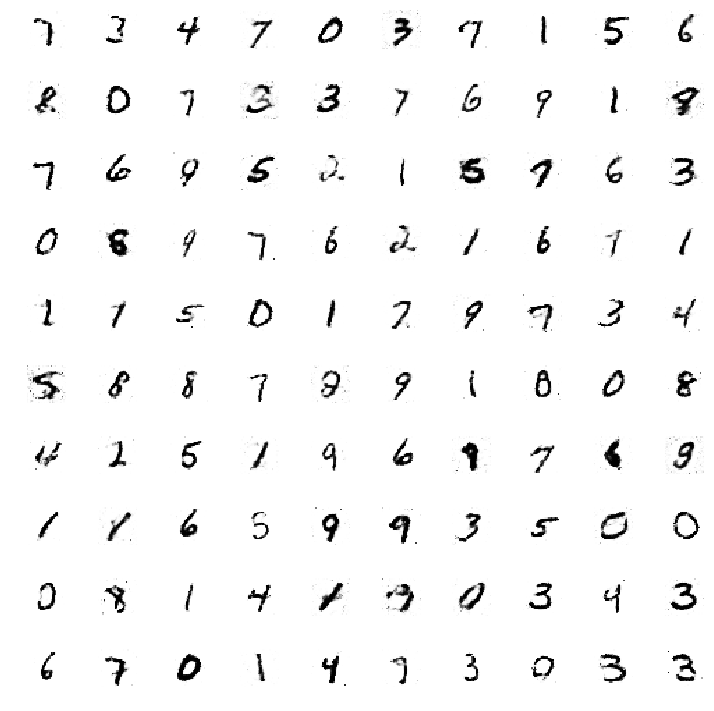

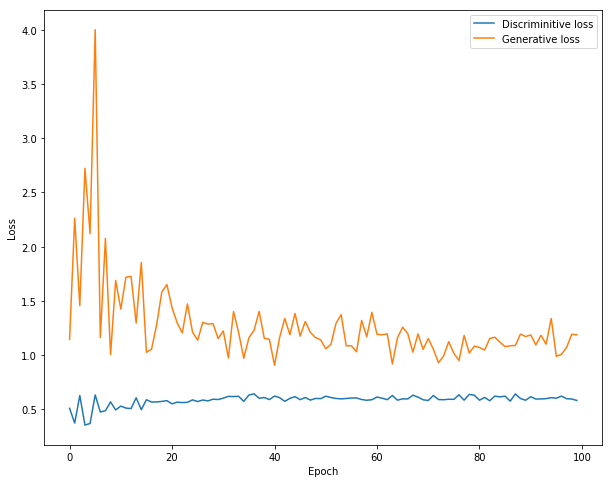

In [8]:
for e in range(num_epoch):
    print ('-'*15, 'Epoch %d' % e, '-'*15)
    for _ in tqdm(range(batchCount)):
        # Get a random set of input noise and images
        noise = np.random.normal(0, 1, size=[batchsize, randomDim])
        imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchsize)]

        # Generate fake MNIST images
        generatedImages = generator.predict(noise)
        # print np.shape(imageBatch), np.shape(generatedImages)
        X = np.concatenate([imageBatch, generatedImages])

        # Labels for generated and real data
        yDis = np.zeros(2*batchsize)
        # One-sided label smoothing
        # the first half of images are real
        yDis[:batchsize] = 0.9

        # Train discriminator
        discriminator.trainable = True
        dloss = discriminator.train_on_batch(X, yDis)

        # Train generator
        noise = np.random.normal(0, 1, size=[batchsize, randomDim])
        yGen = np.ones(batchsize)
        # fix the discriminator and train the generator
        discriminator.trainable = False
        gloss = gan.train_on_batch(noise, yGen)

    # Store loss of most recent batch from this epoch
    dLosses.append(dloss)
    gLosses.append(gloss)

    if e % 10 == 0:
        plotGeneratedImages(e)
        #saveModels(e)


plt.figure(figsize=(10, 8))
plt.plot(dLosses, label='Discriminitive loss')
plt.plot(gLosses, label='Generative loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('images_gan/gan_loss_epoch.png')
plt.show()

We could go to the folder ***images_gan*** to chheck the generated images during the training phase and the loss under the each 

#### What is More:

The above example is the implementation of a very basic GAN model, which can be improved for higher quality of generated images. For example, you may use convolutional layers to replace the fully connected layers. 

For more advanced GAN models, you can find their keras implementations in the following link:

https://github.com/eriklindernoren/Keras-GAN